# Trabalho 3 - Filtros

## Instituto Federal de Santa Catarina – IFSC
## Disciplina: DSP2 – Processamento Digital de Sinais

### Aluno: Lucas Martins Wollinger


Após fazer uma gravação para uma aula, um professor notou um bip intermitente no áudio.

Para retirar este ruído, aplique um filtro passa-baixas:



1) Verifique a frequência do bip (no Ocenaudio) e projete um filtro passa-baixas FIR pelo método do janelamento de forma que este bip seja retirado sem modificar demasiadamente o áudio original.

FFT do áudio:

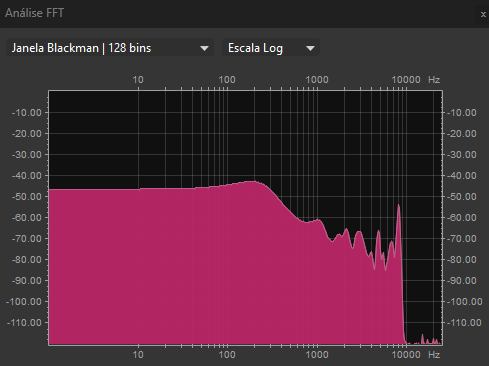

FFT do áudio filtrado:

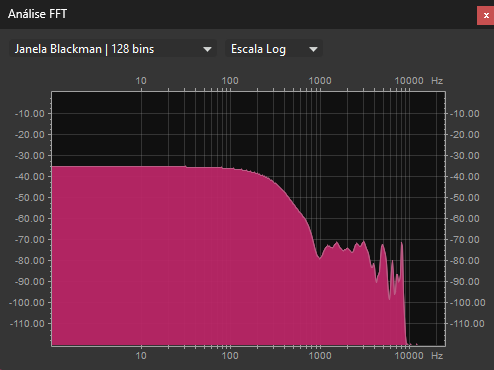

Filtro Hamming projetado no PyFDA:

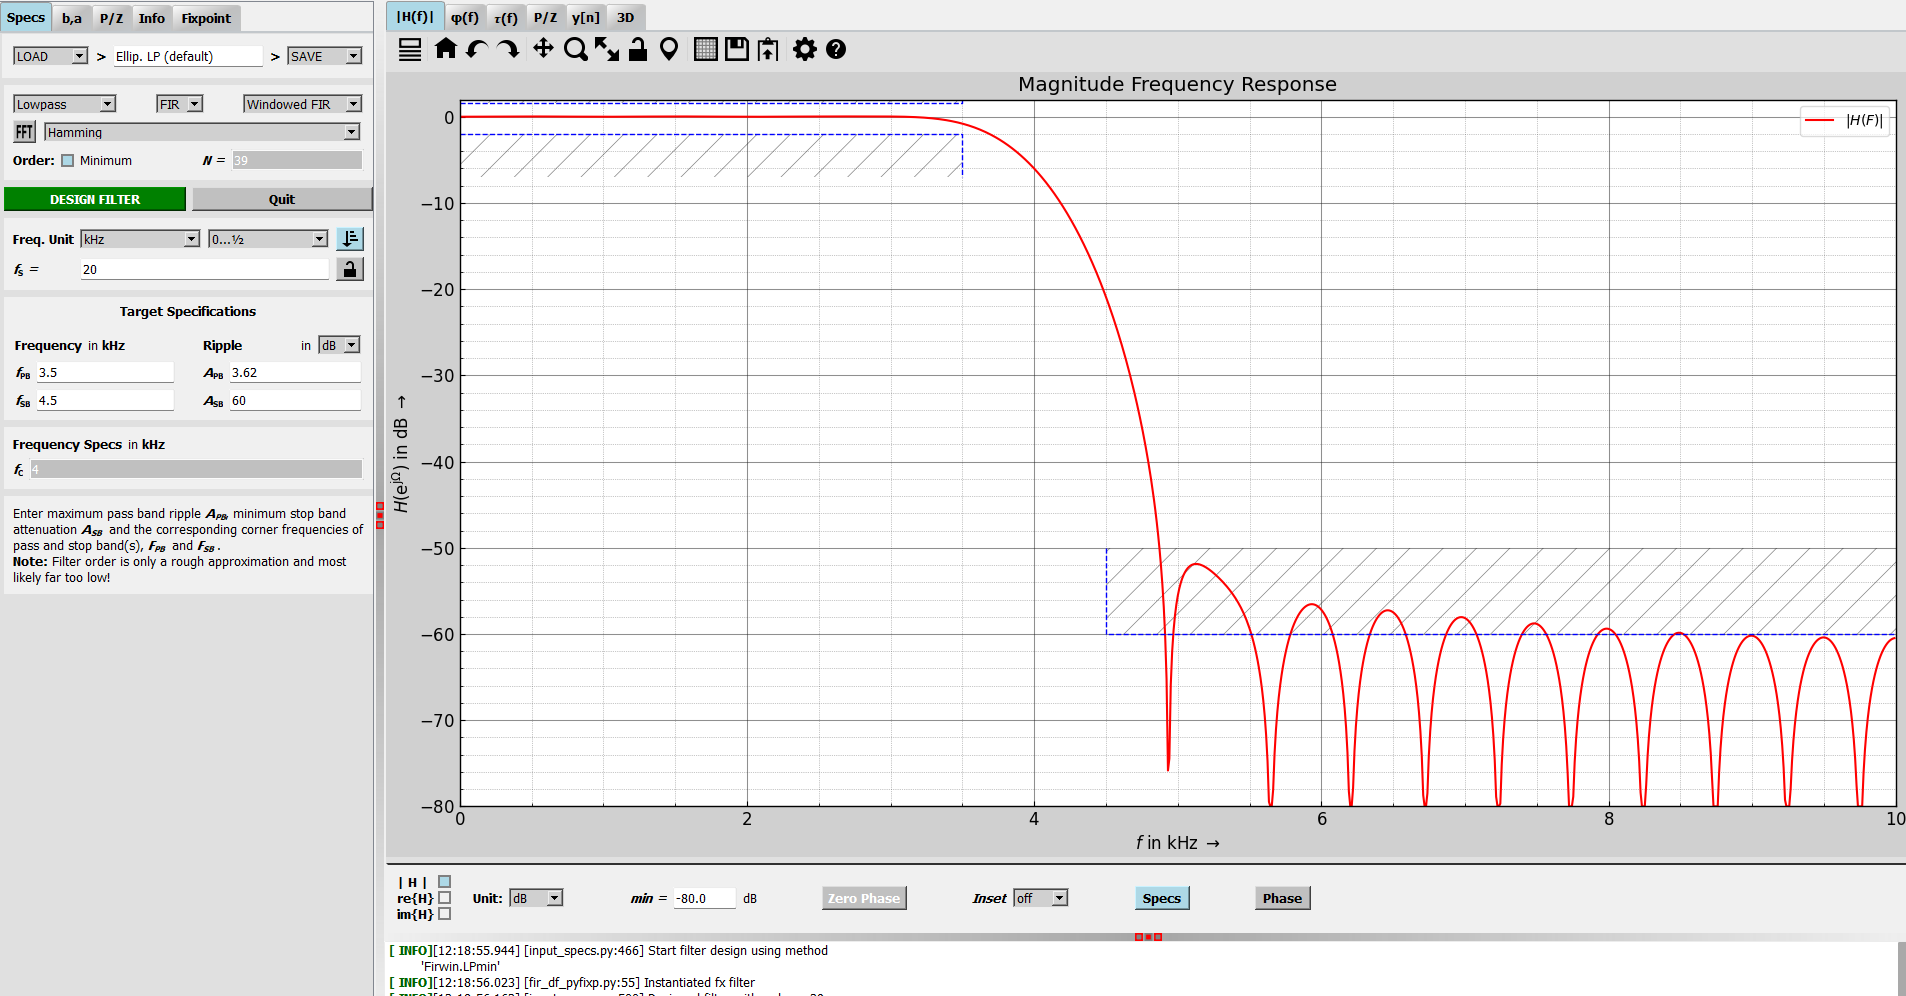

## Parâmetros e Coeficientes do Filtro:

Tipo: FIR (Finite Impulse Response)

Método de projeto: FIR (Janela de Hamming)

Topologia: Filtro Passa-Baixa (Lowpass)

Ordem escolhida: N = 39 coeficientes

Frequência de amostragem (fs): 20 kHz --> Dobro da frequência que julgamos ser o ruído.

Frequência de passagem (fₚ): 3,5 kHz

Frequência de rejeição (fₛ): 4,5 kHz

Ripple na banda de passagem (Aₚ): 3,62 dB

Atenuação mínima na banda de rejeição (Aₛ): 60 dB


2) Aplique um ruído branco E um sinal de varredura (20 a 20 kHz) para verificar o correto funcionamento e características do filtro de acordo com o projeto. Cuidado com ajuste das amplitudes, principalmente para não saturar o filtro.

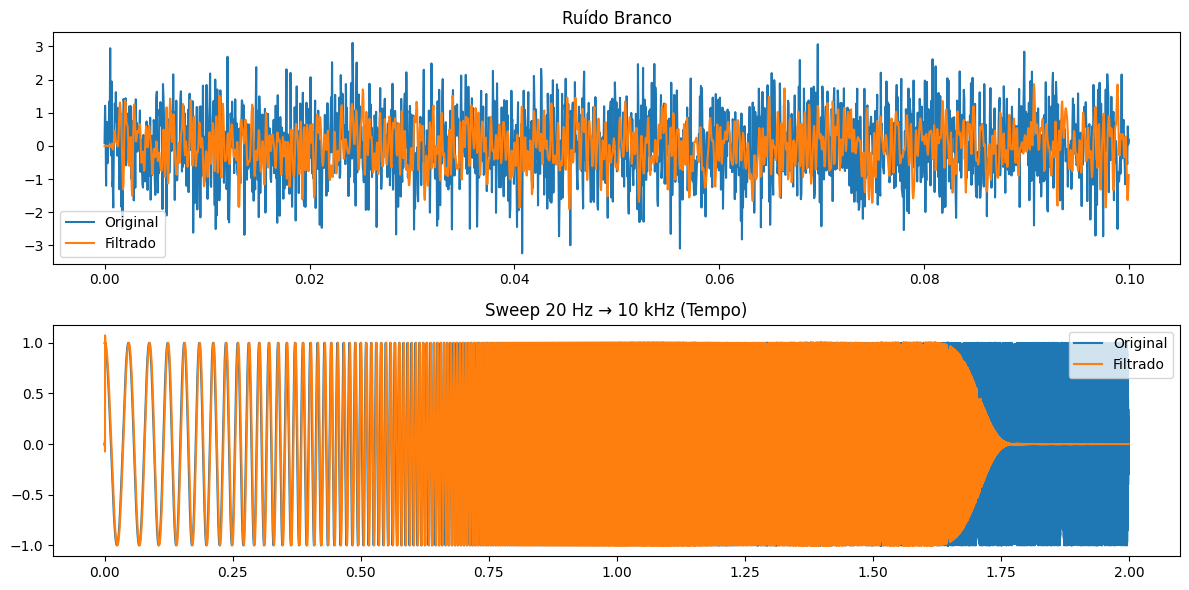

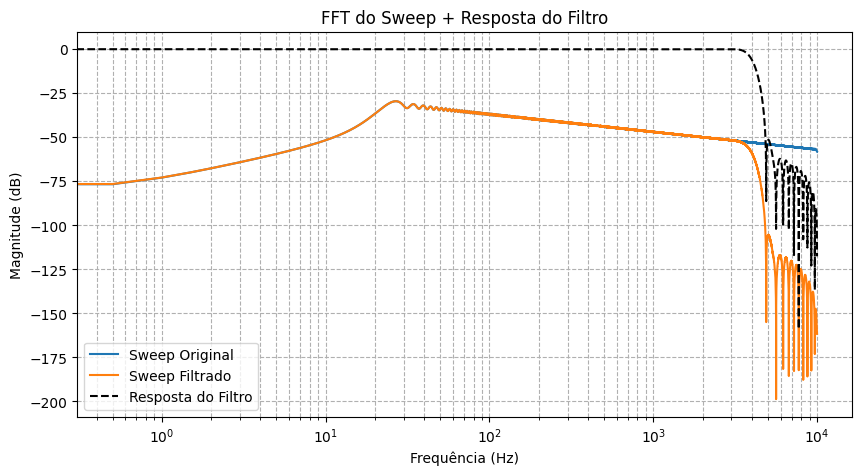

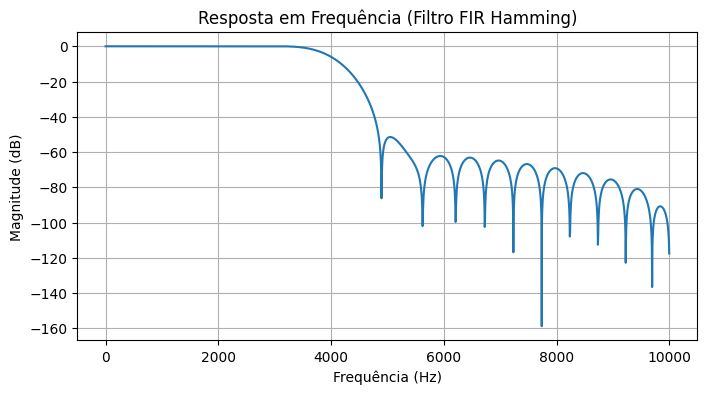

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, firwin, lfilter, freqz

# Parâmetros do Filtro
fs = 20000    # taxa de amostragem
fc = 4000     # frequência de corte
ordem = 39    # ordem do filtro FIR
T = 2.0       # duração do sinal para teste
t = np.linspace(0, T, int(T*fs), endpoint=False)

# Ruído branco
ruido = np.random.normal(0, 1, len(t))

# Sweep 20 Hz -> 10 kHz (até fs/2 = 10 kHz, não pode ir a 20 kHz com fs=20kHz)
sweep = chirp(t, f0=20, f1=fs/2, t1=T, method='logarithmic')

# FILTRO FIR (Hamming)
numtaps = ordem + 1
h = firwin(numtaps, cutoff=fc, fs=fs, window="hamming")


# APLICAR FILTRO
ruido_filtrado = lfilter(h, 1.0, ruido)
sweep_filtrado = lfilter(h, 1.0, sweep)

# FFT
def calc_fft(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, d=1/fs)
    fft_mag = np.abs(fft_vals) / N
    return fft_freqs[:N//2], fft_mag[:N//2]

freqs_in, mag_in = calc_fft(sweep, fs)
freqs_out, mag_out = calc_fft(sweep_filtrado, fs)

# PLOTAR
plt.figure(figsize=(12,6))

# Ruído: original vs filtrado (mesma figura)
plt.subplot(2,1,1)
plt.plot(t[:2000], ruido[:2000], label="Original")
plt.plot(t[:2000], ruido_filtrado[:2000], label="Filtrado")
plt.title("Ruído Branco")
plt.legend()

# Sweep no tempo
plt.subplot(2,1,2)
plt.plot(t, sweep, label="Original")
plt.plot(t, sweep_filtrado, label="Filtrado")
plt.title("Sweep 20 Hz → 10 kHz (Tempo)")
plt.legend()
plt.tight_layout()
plt.show()

# FFT do sweep com resposta do filtro
w, H = freqz(h, worN=2048, fs=fs)

plt.figure(figsize=(10,5))
plt.semilogx(freqs_in, 20*np.log10(mag_in), label="Sweep Original")
plt.semilogx(freqs_out, 20*np.log10(mag_out), label="Sweep Filtrado")
plt.semilogx(w, 20*np.log10(np.abs(H)), 'k--', label="Resposta do Filtro")
plt.title("FFT do Sweep + Resposta do Filtro")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", ls="--")
plt.legend()

# RESPOSTA EM FREQUÊNCIA
w, H = freqz(h, worN=2048, fs=fs)
plt.figure(figsize=(8,4))
plt.plot(w, 20*np.log10(np.abs(H)))
plt.title("Resposta em Frequência (Filtro FIR Hamming)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()


plt.tight_layout()
plt.show()


3) Depois, filtre o sinal e verifique o resultado (ouça e visualize o espectograma).

Áudio original:


/tmp/ipython-input-4290688479.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, voz = wavfile.read(arquivo)


Áudio filtrado:


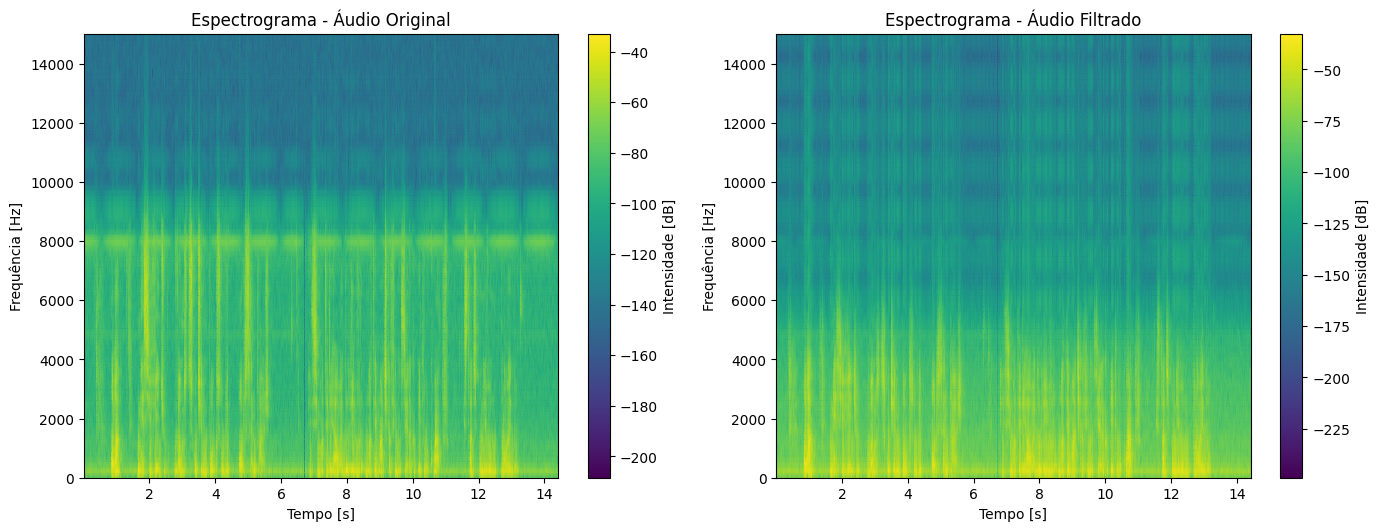

In [ ]:
from scipy.io import wavfile
from scipy.signal import firwin, lfilter, spectrogram
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt

# Leitura do arquivo
arquivo = "fala-tom-alta-freq.wav"
fs, voz = wavfile.read(arquivo)

# Converte para float e mono
voz = voz.astype(np.float64)
if voz.ndim == 2:   # estéreo
    voz = voz[:,0]  # pega só canal esquerdo
# normaliza [-1, 1]
voz = voz / np.max(np.abs(voz))


# PARÂMETROS
fc = 4000     # frequência de corte (Hz)
ordem = 39    # ordem do filtro FIR

# ILTRO FIR (Hamming)
numtaps = ordem + 1
h = firwin(numtaps, cutoff=fc, fs=fs, window="hamming")

# Aplicando o Filtro
voz_filtrada = lfilter(h, 1.0, voz)

# Reproduzir áudio
print("Áudio original:")
display(Audio(voz, rate=fs))

print("Áudio filtrado:")
display(Audio(voz_filtrada, rate=fs))

# FFT
def calc_fft(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_vals = np.abs(fft_vals[:N // 2])
    freqs = np.fft.fftfreq(N, 1/fs)[:N // 2]
    fft_db = 20 * np.log10(np.maximum(fft_vals, 1e-12))  # evita -inf
    return freqs, fft_db

freqs_voz, fft_voz = calc_fft(voz, fs)
freqs_filt, fft_filt = calc_fft(voz_filtrada, fs)

# ESPECTROGRAMAS
f1, t1, S1 = spectrogram(voz, fs)
f2, t2, S2 = spectrogram(voz_filtrada, fs)

# PLOTS dos Gráficos
plt.figure(figsize=(14,10))

# Espectrograma Original
plt.subplot(2,2,3)
plt.pcolormesh(t1, f1, 10*np.log10(S1), shading="gouraud")
plt.title("Espectrograma - Áudio Original")
plt.xlabel("Tempo [s]")
plt.ylabel("Frequência [Hz]")
plt.ylim(0, 15000)
plt.colorbar(label="Intensidade [dB]")

# Espectrograma Filtrado
plt.subplot(2,2,4)
plt.pcolormesh(t2, f2, 10*np.log10(S2), shading="gouraud")
plt.title("Espectrograma - Áudio Filtrado")
plt.xlabel("Tempo [s]")
plt.ylabel("Frequência [Hz]")
plt.ylim(0, 15000)
plt.colorbar(label="Intensidade [dB]")

plt.tight_layout()
plt.show()


É possível observar no espectro a ação do filtro, verifica-se que o sinal filtrado mostra que a energia do sinal está concentrada na banda de interesse da fala, enquanto as componentes de alta frequência foram removidas, validando o comportamento esperado do filtro.

Pode se analisar também que em 8kHz tem uma frequência constante, que provavelmente é a do ruído e portanto na segunda figura do sinal filtrado percebe-se que ela foi praticamente eliminada.

In [4]:
!jupyter nbconvert --to html "/content/Tarefa_3_Filtros_Lucas_Wollinger.ipynb"

[NbConvertApp] Converting notebook /content/Tarefa_3_Filtros_Lucas_Wollinger.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 5523872 bytes to /content/Tarefa_3_Filtros_Lucas_Wollinger.html


In [5]:
from google.colab import files
files.download("Tarefa_3_Filtros_Lucas_Wollinger.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>